# Collab groupe 2

##Chargement base de donnée et bibliotèques

Chargement des bibliotèques :

In [5]:
#Chargement des données
# Data
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os 
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import math

# Graphics
import seaborn as sns 

from sklearn.experimental import enable_halving_search_cv # noqa

from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
# from sklearn.metrics import root_mean_squared_error

Chargement des données sur la base de donnée :

In [6]:
load_dotenv('BDD_URL.env')
BDD_URL = os.environ['BDD_URL']
engine = create_engine(BDD_URL)

SQL= """
SET search_path to principal;
SELECT  "primaryTitle", "titleType", "isAdult", "startYear", "runtimeMinutes", "genres", "averageRating", "directors", "writers", "actor", "producer", "cinematographer", "composer", "editor", "production_designer", "self", "archive_footage", "archive_sound"
from "castview"
where  "runtimeMinutes" < 380 and "runtimeMinutes" Is NOT null and "averageRating" is NOT NULL and "genres" is NOT NULL and "startYear" is NOT NULL and "isAdult" is NOT NULL  and "directors" is NOT NULL and  "writers" is NOT NULL  and  "actor" is NOT NULL  and  "producer" is NOT NULL
ORDER BY "tconst" desc
limit 10000;
"""

#and "titleType" = 'movie' 

df = pd.read_sql(SQL, engine)
engine.dispose()
df

,primaryTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,directors,writers,actor,producer,cinematographer,composer,editor,production_designer,self,archive_footage,archive_sound
0,Horrid Henry Knows It All,tvEpisode,0,2014,10,"Adventure,Animation,Comedy",8.2,"Hilary_Audus,Kevin_Micallef","Francesca_Simon,Lucinda_Whiteley","Aidan_Cook,Lizzie_Waterworth,Sue_Elliott-Nicho...",Erica_Darby,None,None,None,None,None,None,None
1,Horrid Henry's Comic Caper,tvEpisode,0,2014,11,"Adventure,Animation,Comedy",8.8,"Hilary_Audus,Kevin_Micallef","Francesca_Simon,Lucinda_Whiteley","Aidan_Cook,Lizzie_Waterworth,Sue_Elliott-Nicho...",Erica_Darby,None,None,None,None,None,None,None
2,6 Gunn,movie,0,2017,116,Drama,7.6,Kiran_Gawade,Kiran_Gawade,"Bhushan_Pradhan,Devadhar_Archit,Ganesh_Vasant_...","Abhishek_Jathar,Ujjwala_Gawde",Suresh_Deshmane,None,Rohita_More,None,None,None,None
3,Horrid Henry Delivers the Milk,tvEpisode,0,2012,10,"Adventure,Animation,Comedy",8.3,"Hilary_Audus,Kevin_Micallef","Francesca_Simon,Lucinda_Whiteley","Aidan_Cook,Lizzie_Waterworth,Sue_Elliott-Nicho...",Erica_Darby,None,None,None,None,None,None,None
4,Horrid Henry Nothing but the Truth,tvEpisode,0,2012,10,"Adventure,Animation,Comedy",9.2,"Hilary_Audus,Kevin_Micallef","Francesca_Simon,Lucinda_Whiteley","Aidan_Cook,Lizzie_Waterworth,Sue_Elliott-Nicho...",Erica_Darby,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"Pain, Love and Sacrifice to the Gods",tvEpisode,0,2018,44,"Action,Drama,Sport",7.8,"Quinn_Saunders,Skip_Chaisson",Christopher_DeJoseph,"Brian_Cage,Jeffrey_Cobb,Justin_Borden,Melissa_...",Alex_Garcia,None,None,Nick_Staller,None,None,None,None
9996,Aleppo,short,0,2019,20,"Drama,Short",8.7,Anthony_Grippa,"Brennan_Elizabeth_Peters,Morris_Long","Alexander_Saliba,Amel_Khalil,Laëtitia_Eïdo,Wal...","Bayard_D_Outerbridge,Justin_Ambrosino",None,Alexis_&_Sam,None,None,None,None,None
9997,Volume 3: Chapter IX,tvEpisode,0,2019,25,"Comedy,Drama",6.2,Salli_Richardson-Whitfield,"Justin_Simien,Leann_Bowen,Nastaran_Dibai,Njeri...","Antoinette_Robertson,Brandon_P_Bell,DeRon_Hort...",Caroline_James,None,None,None,None,None,None,None
9998,Volume 3: Chapter VII,tvEpisode,0,2019,33,"Comedy,Drama",6.4,Tiffany_Johnson,"Justin_Simien,Leann_Bowen,Steven_J._Kung","Antoinette_Robertson,Brandon_P_Bell,DeRon_Hort...","Caroline_James,Jaclyn_Moore",None,None,None,None,None,None,None


## Analyse des données

Répartition des données

In [7]:
df['titleType'].value_counts()

titleType
tvEpisode    4433
movie        3399
short        1685
tvMovie       332
video         117
tvShort        23
tvSpecial       9
videoGame       2
Name: count, dtype: int64

##L'analyse univariée

Text(0, 0.5, 'Nombre de Film')

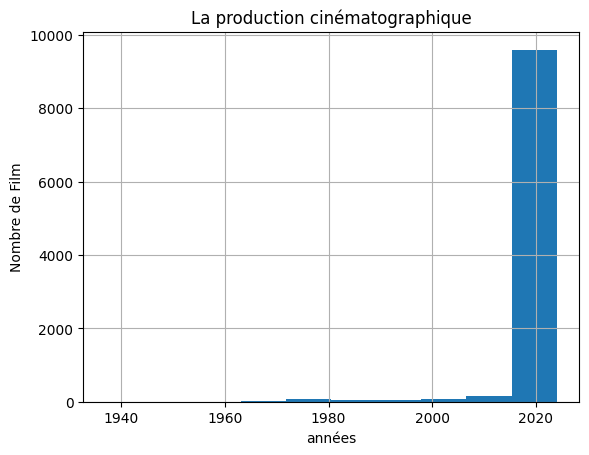

In [8]:
df['startYear'].hist()
plt.title('La production cinématographique')
plt.xlabel('années')
plt.ylabel('Nombre de Film')

Text(0, 0.5, 'Nombre de Film')

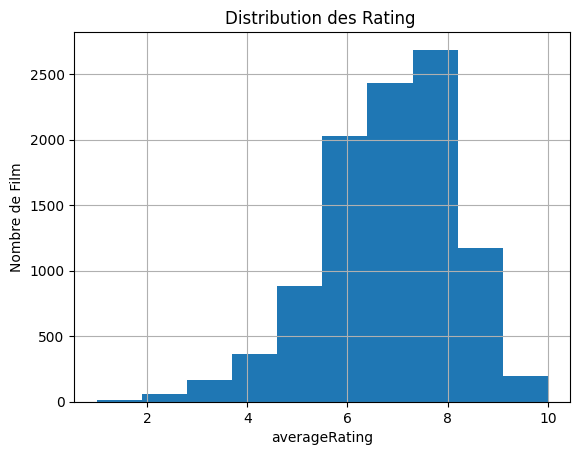

In [9]:
df['averageRating'].hist()
plt.title('Distribution des Rating ')
plt.xlabel('averageRating')
plt.ylabel('Nombre de Film')

Analyse bivariée

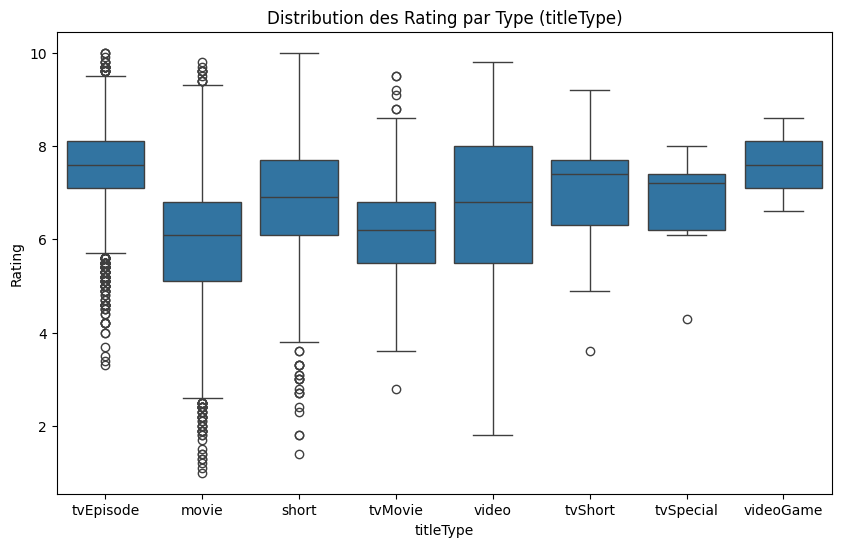

In [10]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='titleType', y='averageRating', data=df)
plt.title('Distribution des Rating par Type (titleType)')
plt.xlabel('titleType')
plt.ylabel('Rating')
plt.show()

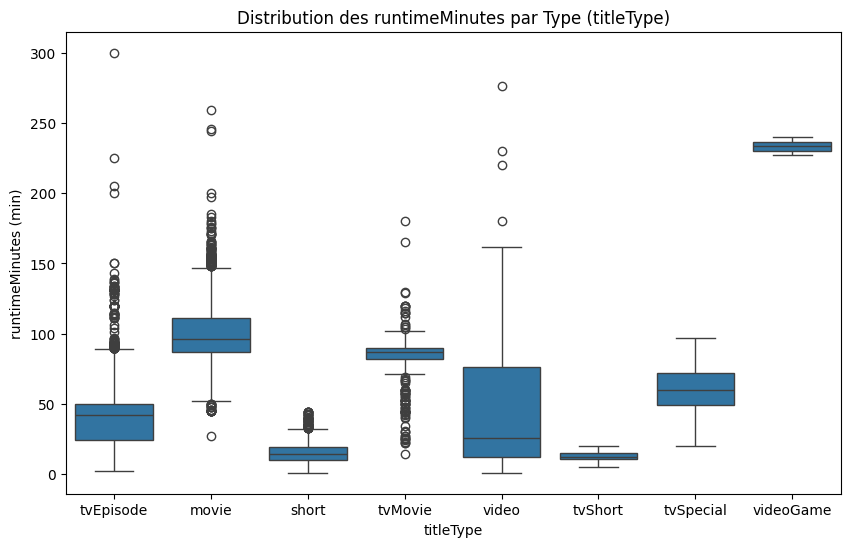

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='titleType', y='runtimeMinutes', data=df[df["runtimeMinutes"]<380])
plt.title('Distribution des runtimeMinutes par Type (titleType)')
plt.xlabel('titleType')
plt.ylabel('runtimeMinutes (min)')
plt.show()

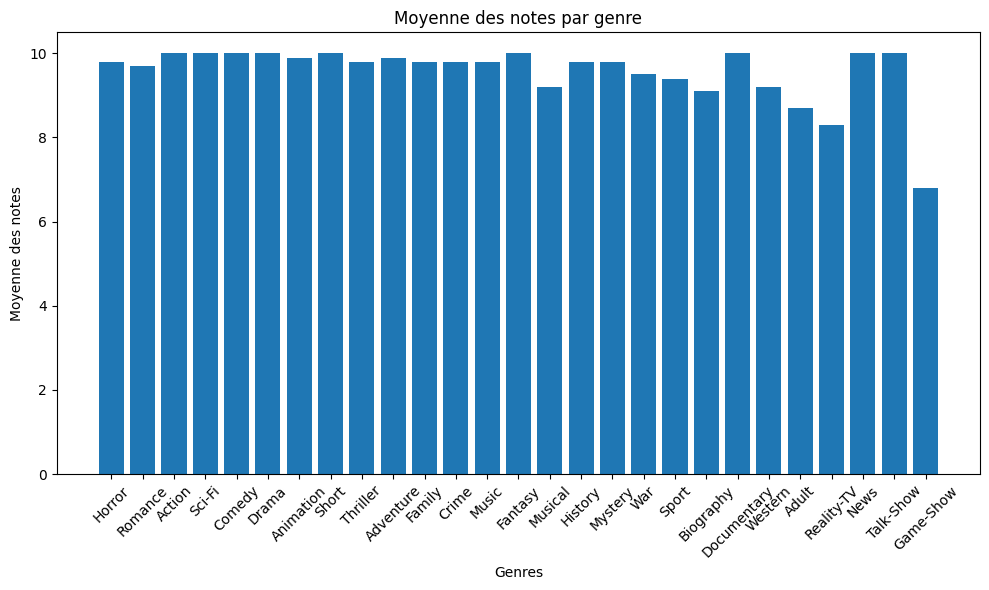

In [12]:
# Ce code affiche le rating par genre 
df['genres_split'] = df['genres'].str.split(',')


genres_ratings_df = pd.DataFrame(columns=['genres_split', 'averageRating'])
list=[]

for index, row in df.iterrows():

    for genre in row['genres_split']:

        list.append({'genres_split': genre.strip(), 'averageRating': row['averageRating']})



list = sorted(list, key=lambda x: x['averageRating'])

genres = [entry['genres_split'] for entry in list]
ratings = [entry['averageRating'] for entry in list]


plt.figure(figsize=(10, 6))
plt.bar(genres, ratings)


plt.xlabel('Genres')
plt.ylabel('Moyenne des notes')
plt.title('Moyenne des notes par genre')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()  # Ajustement automatique des marges


plt.show()

Analyse multivariée

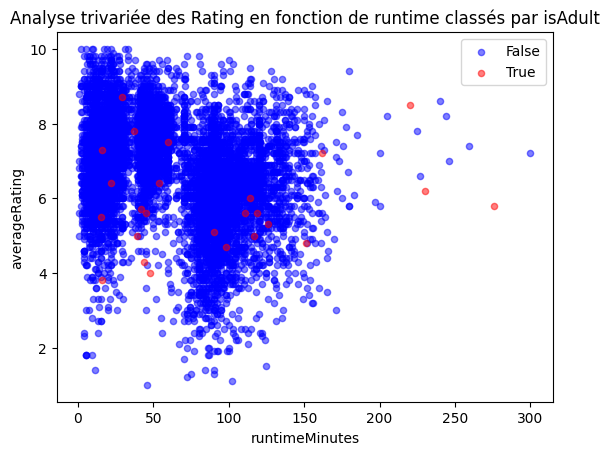

In [13]:
fig, ax = plt.subplots()

for key, group in df[df["runtimeMinutes"]<380].groupby('isAdult'):
    
    if key== 1:
        c='red'
    else:
        c='blue'
    group.plot.scatter(ax=ax, x='runtimeMinutes', y='averageRating', label=bool(key), c=c, alpha=0.5)
plt.title('Analyse trivariée des Rating en fonction de runtime classés par isAdult')
plt.show()

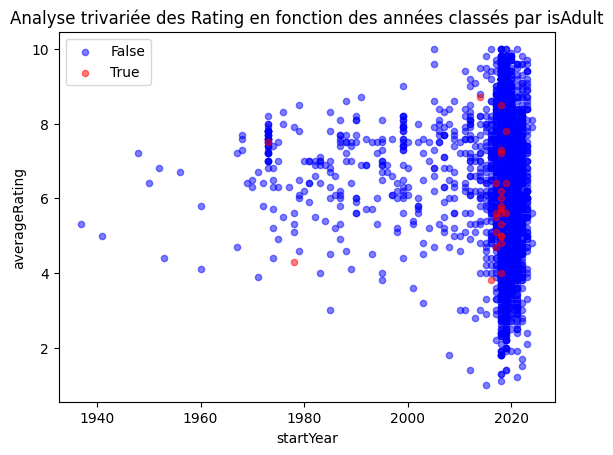

In [14]:
fig, ax = plt.subplots()

for key, group in df[df["runtimeMinutes"]<380].groupby('isAdult'):
    
    if key== 1:
        c='red'
    else:
        c='blue'
    group.plot.scatter(ax=ax, x='startYear', y='averageRating', label=bool(key), c=c, alpha=0.5)
plt.title('Analyse trivariée des Rating en fonction des années classés par isAdult')
plt.show()

Nettoyage des données

In [15]:
def liste_en_texte(lst):
    if isinstance(lst, list):
        return ' '.join(lst)
    else:
        return lst

In [16]:
def cleanText(df):
    df.fillna('missing', inplace=True)
    df=df.str.replace(',', ' ')
    return df

In [17]:
columns_to_clean = ['primaryTitle', 'titleType', 'genres', 'directors', 'writers', 
                    'actor', 'producer', 'cinematographer', 'composer', 'editor', 
                    'production_designer', 'self', 'archive_footage', 'archive_sound']

for column in columns_to_clean:
    df[column] = cleanText(df[column])

In [18]:
df

,primaryTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,directors,writers,actor,producer,cinematographer,composer,editor,production_designer,self,archive_footage,archive_sound,genres_split
0,Horrid Henry Knows It All,tvEpisode,0,2014,10,Adventure Animation Comedy,8.2,Hilary_Audus Kevin_Micallef,Francesca_Simon Lucinda_Whiteley,Aidan_Cook Lizzie_Waterworth Sue_Elliott-Nicho...,Erica_Darby,missing,missing,missing,missing,missing,missing,missing,"[Adventure, Animation, Comedy]"
1,Horrid Henry's Comic Caper,tvEpisode,0,2014,11,Adventure Animation Comedy,8.8,Hilary_Audus Kevin_Micallef,Francesca_Simon Lucinda_Whiteley,Aidan_Cook Lizzie_Waterworth Sue_Elliott-Nicho...,Erica_Darby,missing,missing,missing,missing,missing,missing,missing,"[Adventure, Animation, Comedy]"
2,6 Gunn,movie,0,2017,116,Drama,7.6,Kiran_Gawade,Kiran_Gawade,Bhushan_Pradhan Devadhar_Archit Ganesh_Vasant_...,Abhishek_Jathar Ujjwala_Gawde,Suresh_Deshmane,missing,Rohita_More,missing,missing,missing,missing,[Drama]
3,Horrid Henry Delivers the Milk,tvEpisode,0,2012,10,Adventure Animation Comedy,8.3,Hilary_Audus Kevin_Micallef,Francesca_Simon Lucinda_Whiteley,Aidan_Cook Lizzie_Waterworth Sue_Elliott-Nicho...,Erica_Darby,missing,missing,missing,missing,missing,missing,missing,"[Adventure, Animation, Comedy]"
4,Horrid Henry Nothing but the Truth,tvEpisode,0,2012,10,Adventure Animation Comedy,9.2,Hilary_Audus Kevin_Micallef,Francesca_Simon Lucinda_Whiteley,Aidan_Cook Lizzie_Waterworth Sue_Elliott-Nicho...,Erica_Darby,missing,missing,missing,missing,missing,missing,missing,"[Adventure, Animation, Comedy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Pain Love and Sacrifice to the Gods,tvEpisode,0,2018,44,Action Drama Sport,7.8,Quinn_Saunders Skip_Chaisson,Christopher_DeJoseph,Brian_Cage Jeffrey_Cobb Justin_Borden Melissa_...,Alex_Garcia,missing,missing,Nick_Staller,missing,missing,missing,missing,"[Action, Drama, Sport]"
9996,Aleppo,short,0,2019,20,Drama Short,8.7,Anthony_Grippa,Brennan_Elizabeth_Peters Morris_Long,Alexander_Saliba Amel_Khalil Laëtitia_Eïdo Wal...,Bayard_D_Outerbridge Justin_Ambrosino,missing,Alexis_&_Sam,missing,missing,missing,missing,missing,"[Drama, Short]"
9997,Volume 3: Chapter IX,tvEpisode,0,2019,25,Comedy Drama,6.2,Salli_Richardson-Whitfield,Justin_Simien Leann_Bowen Nastaran_Dibai Njeri...,Antoinette_Robertson Brandon_P_Bell DeRon_Hort...,Caroline_James,missing,missing,missing,missing,missing,missing,missing,"[Comedy, Drama]"
9998,Volume 3: Chapter VII,tvEpisode,0,2019,33,Comedy Drama,6.4,Tiffany_Johnson,Justin_Simien Leann_Bowen Steven_J._Kung,Antoinette_Robertson Brandon_P_Bell DeRon_Hort...,Caroline_James Jaclyn_Moore,missing,missing,missing,missing,missing,missing,missing,"[Comedy, Drama]"


Séparation des caractéristiques et de la cible et des données d'entraînement et de test avec y comme target et X les features

In [19]:
# Séparation des caractéristiques et de la cible
X = df.drop(columns=["averageRating"])
# X = df[['genres','actor']]
y = df["averageRating"]

# Séparation des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Définition des colonnes numériques, textuelles et de description

In [20]:
# Définition des colonnes numériques, textuelles et de description
numeric_features = ['startYear', 'runtimeMinutes']
boolean_features = 'isAdult'
text_features = ['titleType']

In [21]:
def booleantrans (x):
    return x.astype(bool).values.reshape(-1, 1)

Création des transformers pour les colonnes numériques, booléennes, textuelles et de description et du ColumnTransformer

In [22]:
# Création des transformers pour les colonnes numériques, booléennes, textuelles et de description
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

boolean_transformer = FunctionTransformer(booleantrans) 

text_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Vect_transformer = Pipeline([
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
    ('vect', CountVectorizer(decode_error='ignore', analyzer='word')) #max_features=1000, analyzer="word"
])
tfidf_transformer = Pipeline([
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
    ('tf_idf', TfidfVectorizer(decode_error='ignore',analyzer='word')) #max_features=1000, sublinear_tf=True
])
# Création d'un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bool', boolean_transformer, boolean_features),
        # ('text', text_transformer, text_features), # c'est titleType
        
        ('title', Vect_transformer, 'primaryTitle'), 
        
        ('genres', tfidf_transformer, 'genres'),
        ('producer', tfidf_transformer, 'producer'),       
        ('directors', tfidf_transformer, 'directors'),
        ('writers', tfidf_transformer, 'writers'),
        ('actor', tfidf_transformer, 'actor'),

        # ('cinematographer', tfidf_transformer, 'cinematographer'),
        # ('composer', tfidf_transformer, 'composer'),
        # ('editor', tfidf_transformer, 'editor'),
        # ('production_designer', tfidf_transformer, 'production_designer'),
        # ('selfy', tfidf_transformer, 'self'),
        # ('archive_footage', tfidf_transformer, 'archive_footage'),
        # ('archive_sound', tfidf_transformer, 'archive_sound')
        
        
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['startYear', 'runtimeMinutes']),
                                ('bool',
                                 FunctionTransformer(func=<function booleantrans at 0x0000028206DFC400>),
                                 'isAdult'),
                                ('title',
                                 Pipeline(steps=[('vect',
                                                  CountVectorizer(decode_error='ignore'))]),
                                 'primaryTitle'),
                                ('genres',
                                 P...
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'producer'),
                                ('directors',
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'directors'),
                                ('writers',
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'writers'),
                                ('actor',
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'actor')])

Dictionnaires des modèles ,des paramètres est des scoring

In [23]:
# Création des pipelines pour chaque modèle
pipelines = {
    'Linear Regression': Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'Ridge Regression': Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())]),
    'Lasso Regression': Pipeline([('preprocessor', preprocessor), ('regressor', Lasso())]),
    'ElasticNet': Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet())]),
     'Random Forest Regression': Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor())]),
    'Gradient Boosting Regression': Pipeline([('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor())]),
    'SVR': Pipeline([('preprocessor', preprocessor), ('regressor', SVR())]),
}

# Paramètres pour GridSearchCV pour chaque modèle
parameters = {
    'Linear Regression': {'regressor__fit_intercept': [True,False]},
    'Ridge Regression': {'regressor__alpha': [0.1, 1.0, 5.0,10]},
    'Lasso Regression': {'regressor__alpha': [0.1, 1.0, 5.0,10]},
    'ElasticNet': {'regressor__alpha': [0.1, 1.0, 5.0,10], 'regressor__l1_ratio': [0.1, 0.5, 0.9]},
     'Random Forest Regression': {'regressor__n_estimators': [50,100], 'regressor__max_depth': [10, 20]},# None, 
    'Gradient Boosting Regression': {'regressor__n_estimators': [50,100], 'regressor__max_depth': [10, 20]},
    'SVR': {'regressor__kernel': ['linear', 'rbf'], 'regressor__C': [0.1, 1.0, 10.0]},
}

# Scoring : RMSE, R2 et MAE
scoring = {'RMSE': 'neg_root_mean_squared_error',
           'R2': 'r2',
           'MAE': 'neg_mean_absolute_error'}


Création du GridSearch pour avoir les meilleurs scores, modèles, paramètres.

In [24]:
def Grid(X_train, y_train, pipeline, parameters, cv=5):


  # Grid search
  grid = GridSearchCV(pipeline, parameters,  scoring=scoring, refit='RMSE', cv=cv, n_jobs =-1, verbose = 0)#, error_score='raise'

  # Fit
  grid.fit(X_train, y_train)

  # Scores and results
  best_score = grid.best_score_.round(4)
  best_params = grid.best_params_
  training_time = grid.cv_results_['mean_fit_time'].mean().round(4)

  # Output
  return({
      'best_score': best_score,
      'best_params': best_params,
      'training_time': training_time,
      'fitted_model': grid.best_estimator_
  })

Création de la fonction pour l'affichage des résultats.

In [25]:
def afficheResults (grid):
    model_name = grid['fitted_model'].named_steps['regressor'].__class__.__name__
    print(f"{model_name} training time: {grid['training_time']}")
    print(f"Best {model_name} parameters: {grid['best_params']}")
    print(f"Best {model_name} score: {-grid['best_score']}")
 
    
    

Entraînement de tous les modèles et affichage des résultats en RMSE

In [26]:
# Boucle sur les modèles pour ajuster avec GridSearchCV
models = {}

# Boucle sur les modèles pour ajuster avec GridSearchCV et évaluation
for model_name, pipeline in pipelines.items():
    print(f"\n..............{model_name}..............................")
    grid_search = Grid(X_train, y_train, pipeline, parameters[model_name], cv=5)
    afficheResults (grid_search)
    
    best_model = grid_search['fitted_model']
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    Rmse = round(math.sqrt(mse), 4)
    models[model_name] = [best_model,Rmse]
    print(f"{model_name} RMSE: {Rmse}")


..............Linear Regression..............................
LinearRegression training time: 11.9001
Best LinearRegression parameters: {'regressor__fit_intercept': True}
Best LinearRegression score: 1.6127
Linear Regression RMSE: 1.5018

..............Ridge Regression..............................
Ridge training time: 2.7192
Best Ridge parameters: {'regressor__alpha': 1.0}
Best Ridge score: 1.0409
Ridge Regression RMSE: 1.0103

..............Lasso Regression..............................
Lasso training time: 2.7833
Best Lasso parameters: {'regressor__alpha': 0.1}
Best Lasso score: 1.2692
Lasso Regression RMSE: 1.2466

..............ElasticNet..............................
ElasticNet training time: 3.0789
Best ElasticNet parameters: {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.1}
Best ElasticNet score: 1.2225
ElasticNet RMSE: 1.1993

..............Random Forest Regression..............................
RandomForestRegressor training time: 172.9779
Best RandomForestRegressor param

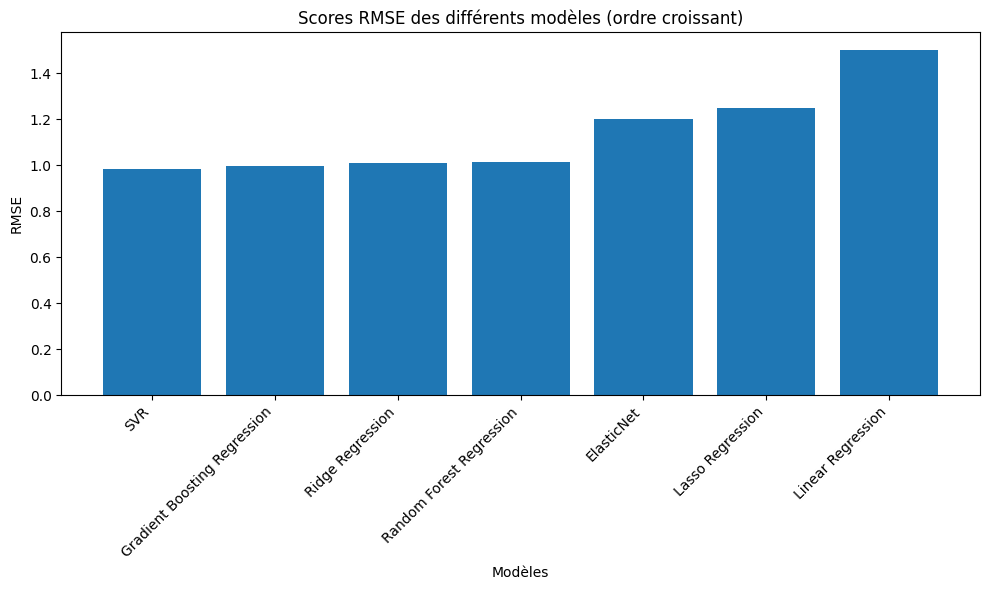

In [27]:
# Trier les modèles par score RMSE croissant
sorted_models = sorted(models.items(), key=lambda x: x[1][1])

# Extraire les noms des modèles et les scores RMSE triés
model_names = [model[0] for model in sorted_models]
rmse_scores = [model[1][1] for model in sorted_models]


# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_scores)
plt.xlabel('Modèles')
plt.ylabel('RMSE')
plt.title('Scores RMSE des différents modèles (ordre croissant)')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()  # Ajustement automatique des marges
plt.show()

Un simple test de prediction

In [28]:
Modelename= 'SVR'
LEmodel=models[Modelename][0]

In [29]:
simple=df.iloc[0:1]
simple

,primaryTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,directors,writers,actor,producer,cinematographer,composer,editor,production_designer,self,archive_footage,archive_sound,genres_split
0,Horrid Henry Knows It All,tvEpisode,0,2014,10,Adventure Animation Comedy,8.2,Hilary_Audus Kevin_Micallef,Francesca_Simon Lucinda_Whiteley,Aidan_Cook Lizzie_Waterworth Sue_Elliott-Nicho...,Erica_Darby,missing,missing,missing,missing,missing,missing,missing,"[Adventure, Animation, Comedy]"


In [30]:
LEmodel.predict(simple)

array([7.75763288])

Sauvegarde du modèle dans un fichier

In [31]:
import pickle

# model est votre modèle entraîné
with open('model_new.pkl', 'wb') as f:
    pickle.dump(LEmodel, f)